# Homework 4
## Pengfei Cheng
## AndrewID: pengfeic

$$\require{mhchem}$$       

# Problem 1

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

# import packages for Problem 1

## Part 1A:  Does the molar flow rate to the reactor matter for determining the final conversion? Why? (1 pt)

Conversion
\begin{equation}
    x = \frac{F_\mathrm{A0}-F_\mathrm{A}}{F_\mathrm{A0}} =1 - \frac{1} {F_\mathrm{A0}} \left (\int_0^{W} -r\mathrm{d}W \right)
\end{equation}

is related to the raction rate $r$.

\begin{equation}
    r=\frac{kC_\mathrm{CO}C_\mathrm{O_2}}{1+KC_\mathrm{CO}}
\end{equation}

raction rate is related to the concentration And the concentration

\begin{equation}
    C_A = \displaystyle\frac{F_\mathrm{A}}{\nu} = \frac{F_A}{\nu_0}\frac{F_\mathrm{T0}}{F_\mathrm{T}} \frac{P}{P_0}
\end{equation}

is related to the molar flow rate. 

Meanwhile, $F_\mathrm{A}$ and $F_\mathrm{T}$ are all relavant to $F_\mathrm{T0}$. So the molar flow rate to the reacter matters fordeterming the final conversion.

We can also prove it by changing the initial molar flow rate in Part 1C.

## Part 1B

In [2]:
T = 838 # K
k = 9.73 * 10 ** 12 * np.exp(-13500/T)  # cm^3/(mol*s*g(catalyst))
K = 8.099 * 10 ** 6 * np.exp (409/T) # cm^3/mol
x0 = np.array([0.02, 0.10, 0, 0.88]).T # molar fraction, referring to CO, O2, CO2 and inert
alpha = 0.00004 # 1/g catalyst
P0 = 6 * 101325 # Pa
FT0 = 0.1 # mol/s
y0 = 1
FA0, FB0, FC0, FI = x0 * FT0
F0 = np.array ([FA0, FB0, FC0, FI, y0]).T
s = np.array([-1,-1/2,1,0]).T # stoichimometric numbers
v0 = FT0 * 8.314 * T / P0 * 10 ** 6 # cm^3 / s

CT0 = P0 / 8.314 / T / 1000 # mol/L
C0 = x0 * CT0
print ('The concentration of each species at the inlet is {} mol/L, referring to CO, O2, CO2 and inert respectively.'.format(C0))

The concentration of each species at the inlet is [ 0.00174519  0.00872597  0.          0.07678856] mol/L, referring to CO, O2, CO2 and inert respectively.


Suppose the inlet molar flow rate is $F$. Then the flow rate of each species is $0.02F, 0.1F, 0, 0.88F$, referring to CO, O2, CO2 and inert respectively.

## Part 1C

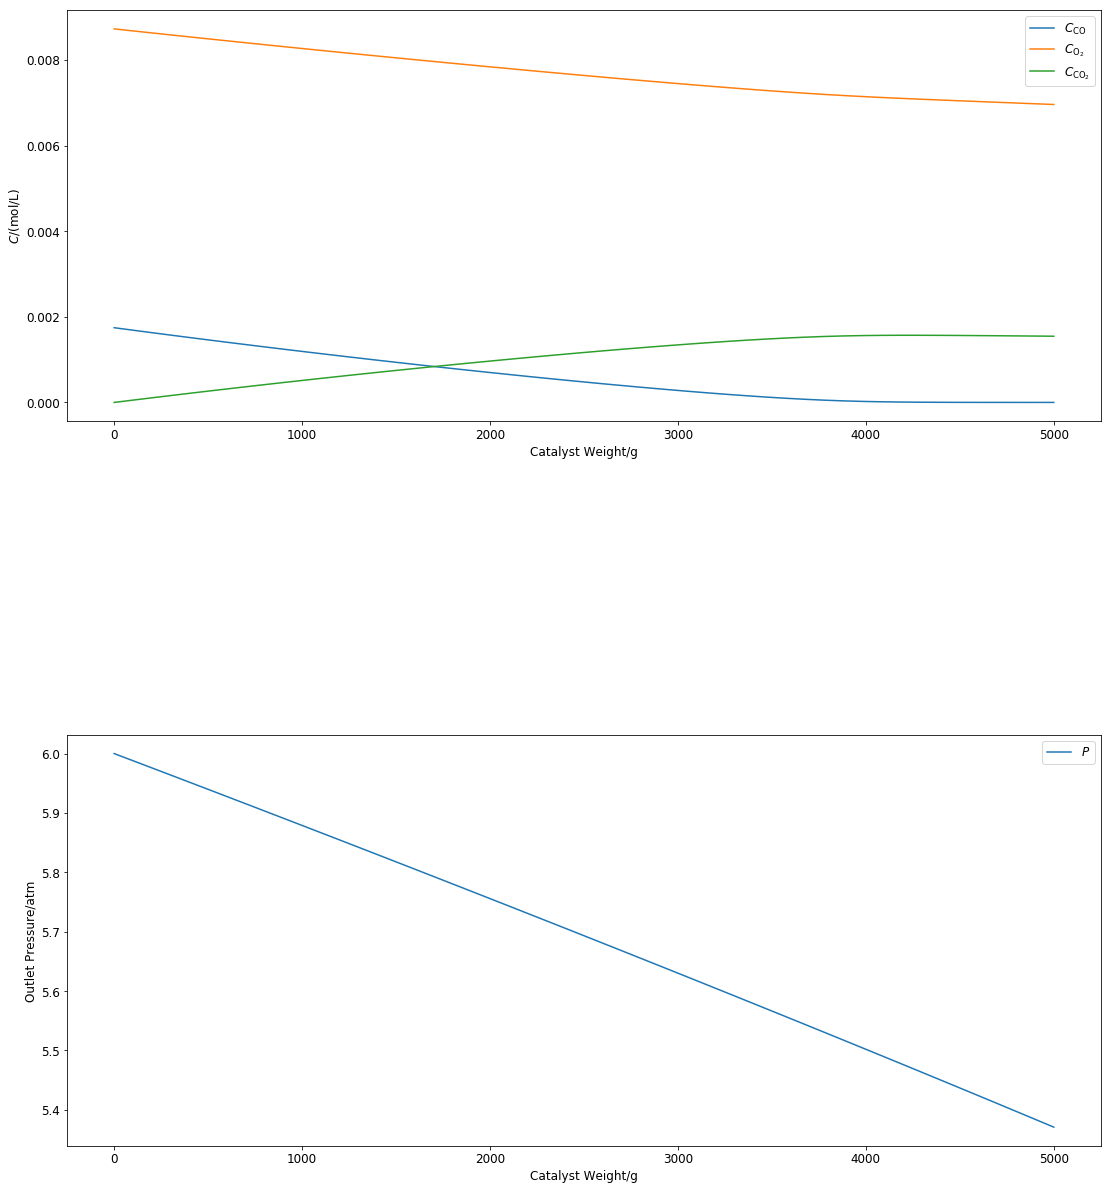

In [3]:
def dFdW2 (F, W):
    FA, FB, FC, FI, y = F
    FT = FA + FB + FC + FI
    P = y * P0
    CA = FA / v0 * y * FT0 / FT
    CB = FB / v0 * y * FT0 / FT 
    
    r1 = k * CA * CB / (1 + K * CA)
    dydW = - alpha / (2 * y) * FT / FT0
    r = np.append (s * r1, dydW)
    return r

Wspan = np.linspace (0, 5000)

sol = odeint (dFdW2, F0, Wspan)

FT = sol[:,0] + sol[:,1] +sol[:,2] + sol[:,3]

plt.subplot(2,1,1)
for i in range (3):
    plt.plot (Wspan,sol[:,i] * (1 / v0) * sol[:,4] * FT[:] /FT0 * 10**3)
plt.legend(['$C_\mathrm{CO}$','$C_\mathrm{O_2}$','$C_\mathrm{CO_2}$'])
plt.xlabel('Catalyst Weight/g')
plt.ylabel('$C$/(mol/L)')

plt.subplot(2,1,2)
plt.plot (Wspan, sol[:,4]*P0/101325)
plt.legend(['$P$'])
plt.ylabel('Outlet Pressure/atm')
plt.xlabel('Catalyst Weight/g')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(18.5, 20.5,forward=True)
plt.show()

## Part 1D

In [4]:
def fun(P):
    P0 = P * 101325
    v0 = FT0 * 8.314 * T / P0 * 10 ** 6
    return odeint (dFdW2, F0, Wspan)[-1,4] * P - 1
    
p_sol = fsolve(fun, 1)
print ('The inlet pressure should be {:1.3f} atm if the outlet pressure is set to 1 atm.'.format(p_sol[0]))

The inlet pressure should be 1.117 atm if the outlet pressure is set to 1 atm.


## Part 1E

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


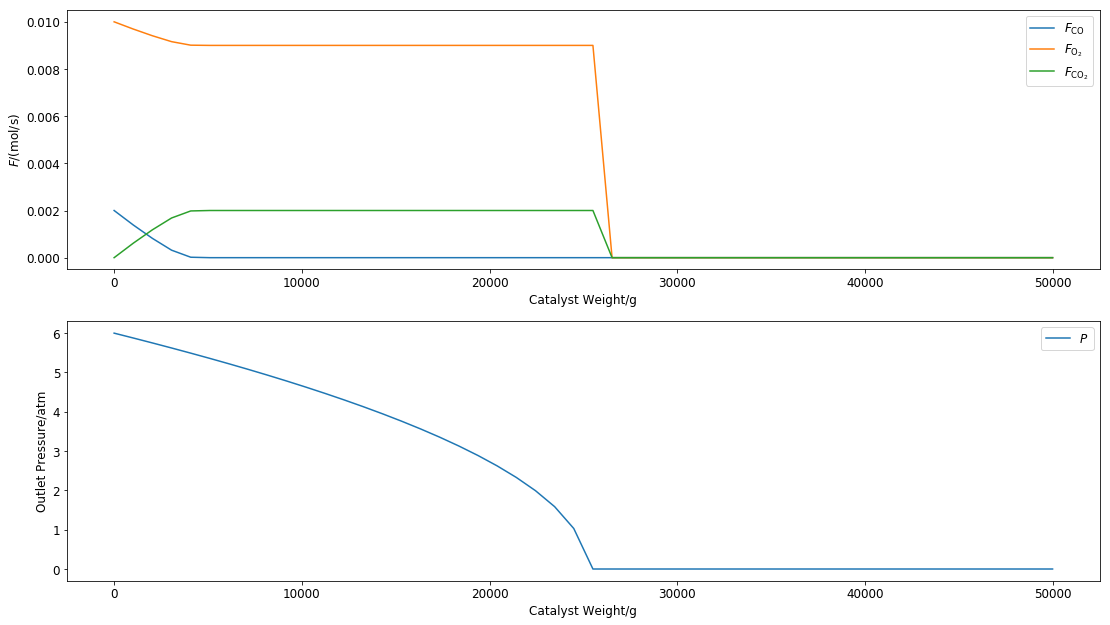

In [5]:
Wspan2 = np.linspace (0, 50000)

sol2 = odeint (dFdW2, F0, Wspan2)

FT = sol2[:,0] + sol2[:,1] +sol2[:,2] + sol2[:,3]

plt.subplot(2,1,1)
for i in range (3):
    # plt.plot (Wspan2,sol2[:,i] * (1 / v0) * sol2[:,4] * FT[:] /FT0 * 10**3)
     plt.plot (Wspan2,sol2[:,i])
plt.legend(['$F_\mathrm{CO}$','$F_\mathrm{O_2}$','$F_\mathrm{CO_2}$'])
plt.xlabel('Catalyst Weight/g')
plt.ylabel('$F$/(mol/s)')

plt.subplot(2,1,2)
plt.plot (Wspan2, sol2[:,4]*P0/101325)
plt.legend(['$P$'])
plt.ylabel('Outlet Pressure/atm')
plt.xlabel('Catalyst Weight/g')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)

plt.show()

The reaction comes to its full extent at around $W = 4000 \mathrm{\ g}$. Then along with the flow proceeds, the pressure drops continueslly and reaches $0$ around $W = 26000 \mathrm{\ g}$. This causes the model to break down, since $0$ cannot be denominator.

# Problem 2

## Part 2A

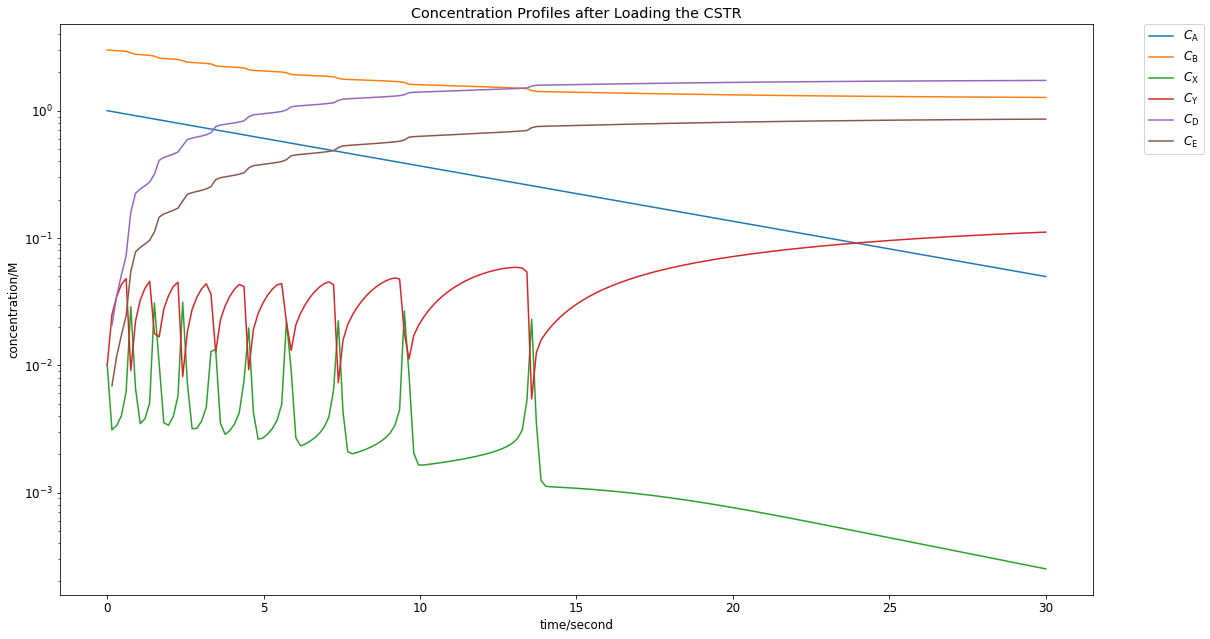

In [6]:
V = 20 # L
C0 = np.array([1, 3, 0.01, 0.01, 0, 0]).T # mol/L, referring to A, B, X, Y, D, E
k = np.array([0.1, 10 ** 5, 10, 10]).T # rate constants
sc = np.array ([[-1, 0, 1, 0, 0, 0], [0, 0, 1 -1, 0, 0], [0, -1, -1, 1, 1, 0], [0, 0, -1, 0, 0, 1]]).T

def dCdt (C, t):
    r1 = k[0] * C[0]
    r2 = k[1] * C[2] ** 2 * C[3]
    r3 = k[2] * C[1] * C[2]
    r4 = k[3] * C[2]
    rA = -r1
    rB = -r3
    rX = r1 + r2 - r3 - r4
    rY = -r2 +r3
    rD = r3
    rE = r4
    return [rA,rB,rX,rY,rD,rE]

tspan = np.linspace (0, 30,200)

sol = odeint (dCdt, C0, tspan)

plt.semilogy (tspan,sol)
plt.legend(['$C_\mathrm{A}$','$C_\mathrm{B}$','$C_\mathrm{X}$','$C_\mathrm{Y}$','$C_\mathrm{D}$','$C_\mathrm{E}$'],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title ('Concentration Profiles after Loading the CSTR')
plt.xlabel('time/second')
plt.ylabel('concentration/M')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)
plt.show()

## Part 2B

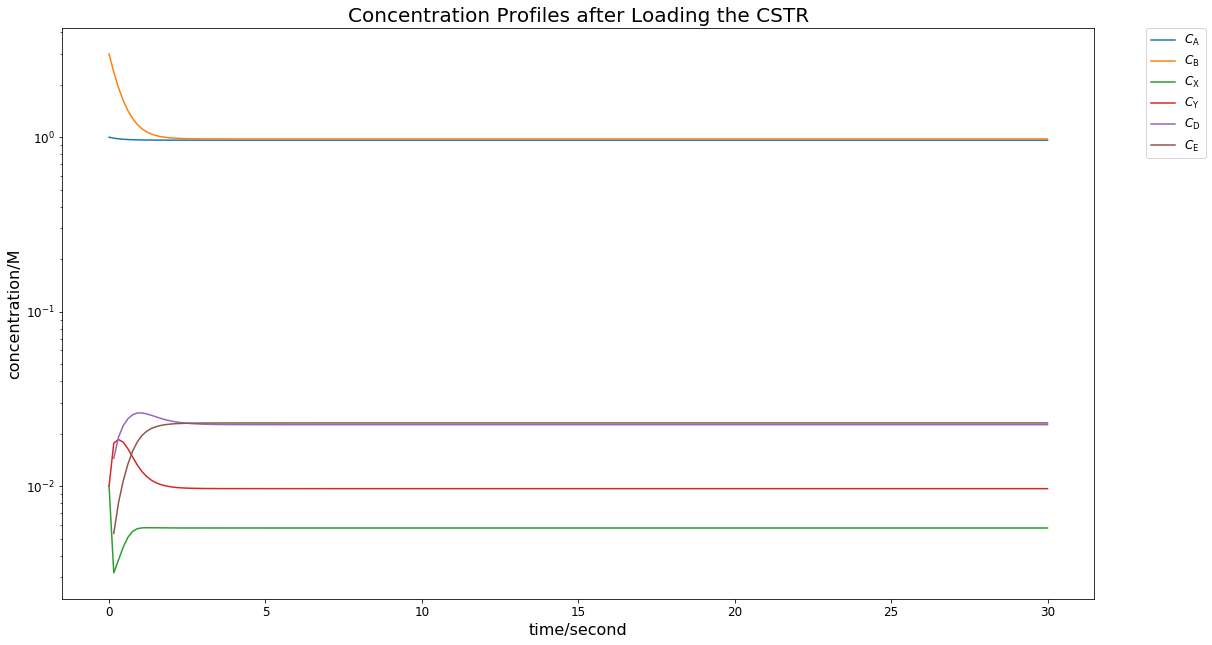

In [7]:
v0 = 50 # L/s

def dCdt2 (C, t):
    F = C * v0
    r1 = k[0] * C[0]
    r2 = k[1] * C[2] ** 2 * C[3]
    r3 = k[2] * C[1] * C[2]
    r4 = k[3] * C[2]
    rA = -r1 + 2.5 - F[0] / V
    rB = -r3 + 2.5 - F[1] / V
    rX = r1 + r2 - r3 - r4 - F[2] / V
    rY = -r2 +r3 - F[3] / V
    rD = r3 - F[4] / V
    rE = r4 - F[5] / V
    return [rA,rB,rX,rY,rD,rE]

sol2 = odeint (dCdt2, C0, tspan)

plt.semilogy (tspan,sol2)
plt.legend(['$C_\mathrm{A}$','$C_\mathrm{B}$','$C_\mathrm{X}$','$C_\mathrm{Y}$','$C_\mathrm{D}$','$C_\mathrm{E}$'],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title ('Concentration Profiles after Loading the CSTR',{'fontsize':20})
plt.xlabel('time/second',{'fontsize':16})
plt.ylabel('concentration/M',{'fontsize':16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)
plt.show()

## Part 2C

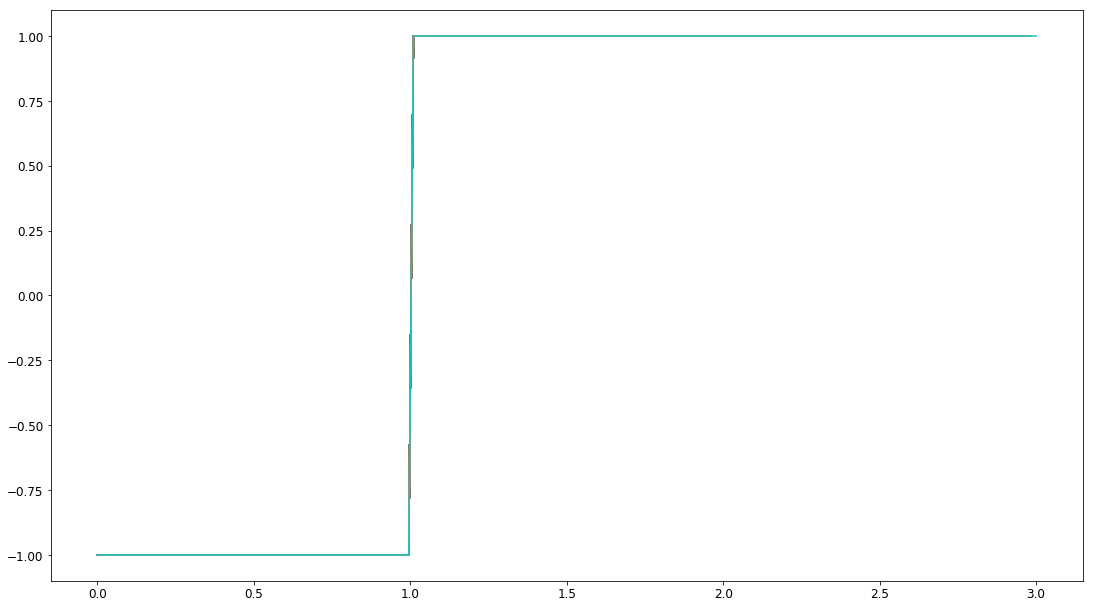

In [8]:
# define a function to determine whether the derivative of C_X is always < 0

def fun(C):
    C0[1] = C
    sol = odeint (dCdt, C0, tspan)
    p = 1
    for i in range (50):
        rX = k[0] * sol[i,0] + k[1] * sol[i,2] ** 2 * sol[i,3] - k[2] * sol[i,1] * sol[i,2] - k[3] * sol[i,2] # calculate the raction rate of X
        if rX > 0:
            p = -1 # if p = -1, then the C-X doesn't meet the requirement
        return p

Cspan = np.linspace (0, 3, 200)

re = [None] * 200

for i in range (200):
    re[i] = fun (Cspan[i])

    plt.plot (Cspan, re)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5,forward=True)
plt.show()

From the figure we can get that any $C_\mathrm{B}\leq1.0$ mol/L will keep X decreasing monotonically.

## Bonus

\begin{align*}
\ce{A&->[k_1] X}\\
\ce{2X + Y &->[k_2] 3 X}\\
\ce{B + X &->[k_3]  Y + D}\\
\ce{X &->[k_4] E}
\end{align*}

If we add reaction (1) to reaction (4), and reaction (2) to (3), we will get the new reactions:

\begin{align*}
\ce{A&-> E}\\
\ce{B &->D}\\
\end{align*}

So $X, Y$ are intermediates, both of which affect the rate of reactions. And the concentration of $B$ affects the rate of $X$ and $Y$ transfering to each other. 

If $C_\mathrm{B}$ is big enough ($\geq 1$ mol/L), then when $C_\mathrm{Y}$ reaches to a certain degree, the total accumulating speed of $X$ is larger than the total consuming speed of $X$, which causes $C_\mathrm{X}$ to increase (and $C_\mathrm{Y}$ to decrease). Then when $C_\mathrm{Y}$ decreases to a certain degree, the total accumulating speed of $X$ becomes smaller than the total consuming speed of $X$ then, causing $C_\mathrm{X}$ to increase. The increasing and decreasing of $C_\mathrm{X}$ and $C_\mathrm{Y}$ causes the instability of the system.